In [106]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### First we will load in our shapefile for King County zipcodes

In [107]:
shape = gp.read_file('../../data/shapefiles/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp')

### let's see those lovely zipcodes

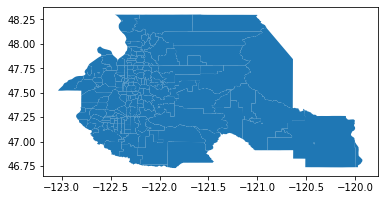

In [108]:
shape.plot();

amazing

### Next we'll get our zipcodes that we got in our previous notebook

In [109]:
zips = pd.read_csv('../../data/zipcodes.csv')

zips = zips[(np.abs(stats.zscore(zips.SalePrice)) < 2.5)]

In [110]:
zipmeans = zips.groupby('ZipCode').mean()

In [111]:
zipmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 98 to 98812
Data columns (total 3 columns):
Unnamed: 0       83 non-null float64
SalePrice        83 non-null float64
SqFtTotLiving    83 non-null float64
dtypes: float64(3)
memory usage: 2.6 KB


### Now we join by zipcode


In [112]:
shape.set_index('ZIP', inplace=True)

In [121]:
join1 = shape.join(zipmeans)
join1 = join1.dropna()

,OBJECTID,ZIPCODE,COUNTY,ZIP_TYPE,Shape_Leng,Shape_Area,geometry,Unnamed: 0,SalePrice,SqFtTotLiving,centers
98001,35,98001,033,Standard,156155.468916,5.324255e+08,"POLYGON ((-122.29061 47.35539, -122.29061 47.3...",31130.960340,4.091698e+05,1914.994334,POINT (-122.26556 47.30894)
98002,34,98002,033,Standard,102448.491058,2.055688e+08,"POLYGON ((-122.22921 47.35375, -122.22921 47.3...",34144.152074,3.432274e+05,1511.788018,POINT (-122.21561 47.30808)
98003,31,98003,033,Standard,120498.915073,3.170769e+08,"POLYGON ((-122.30300 47.35745, -122.30264 47.3...",31200.584507,4.086743e+05,1869.890845,POINT (-122.31459 47.30662)
98004,30,98004,033,Standard,99214.851674,2.505455e+08,"POLYGON ((-122.21195 47.64642, -122.21195 47.6...",27710.845528,1.497716e+06,2433.333333,POINT (-122.20646 47.62080)
98005,29,98005,033,Standard,116409.338972,2.113641e+08,"POLYGON ((-122.15354 47.66056, -122.15342 47.6...",31500.824742,1.317553e+06,2826.247423,POINT (-122.16753 47.61683)
...,...,...,...,...,...,...,...,...,...,...,...
98199,92,98199,033,Standard,90827.901329,4.181248e+08,"POLYGON ((-122.39473 47.66466, -122.39300 47.6...",26436.858447,1.076637e+06,2166.872146,POINT (-122.42338 47.64906)
98224,100,98224,033,PO Box,187335.039773,1.720745e+09,"POLYGON ((-121.36426 47.78010, -121.34643 47.7...",47285.333333,4.154667e+05,1726.666667,POINT (-121.47266 47.73804)
98288,117,98288,033,PO Box,484750.182616,8.748980e+09,"POLYGON ((-121.11918 47.77994, -121.11918 47.7...",40541.142857,1.926429e+05,871.428571,POINT (-121.33554 47.64078)
98354,119,98354,033,Standard,13089.520224,8.506824e+06,"POLYGON ((-122.31646 47.26461, -122.31646 47.2...",31324.416667,3.891288e+05,1812.833333,POINT (-122.32101 47.26045)


### Next we need to add some labels to our shapes

In [122]:
# This adds an internal point to each shape where we will write our label
join1['coords'] = join1['geometry'].apply(lambda x: x.representative_point().coords[:])
join1['coords'] = [coords[0] for coords in join1['coords']]

### Now our map is generated with labels

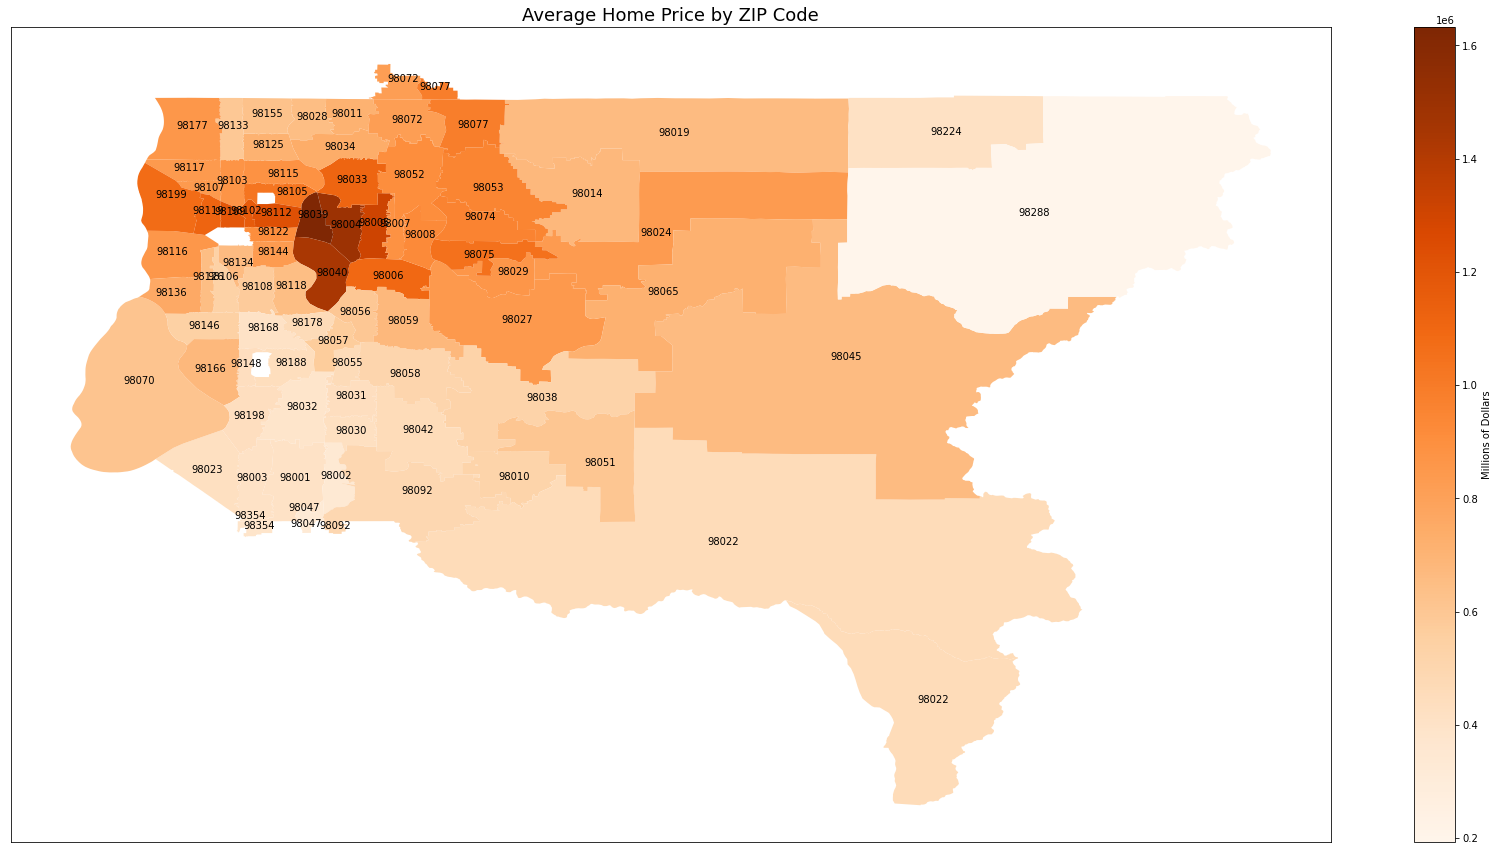

In [130]:
#Plot our figure
fig, ax = plt.subplots(figsize=(30,15))
join1.plot(column='SalePrice', ax=ax, cmap='Oranges', legend=True, legend_kwds={'label': 'Millions of Dollars'})
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Home Price by ZIP Code',fontdict={'fontsize':18})

#Add ZIP codes to each shape
for idx, row in join1.iterrows():
    ax.annotate(s=row['ZIPCODE'], xy=row['coords'],
                 horizontalalignment='center')
plt.show();
fig.savefig('../../src/map.png')

In [118]:
join1.sort_values('SalePrice')

,OBJECTID,ZIPCODE,COUNTY,ZIP_TYPE,Shape_Leng,Shape_Area,geometry,Unnamed: 0,SalePrice,SqFtTotLiving
98288,117,98288,033,PO Box,484750.182616,8.748980e+09,"POLYGON ((-121.11918 47.77994, -121.11918 47.7...",40541.142857,1.926429e+05,871.428571
98047,41,98047,053,Standard,19937.730403,1.931988e+07,"POLYGON ((-122.26205 47.25734, -122.26192 47.2...",33860.000000,3.300111e+05,1387.363636
98047,13,98047,033,Standard,40407.101347,4.843335e+07,"POLYGON ((-122.23107 47.28062, -122.23071 47.2...",33860.000000,3.300111e+05,1387.363636
98002,34,98002,033,Standard,102448.491058,2.055688e+08,"POLYGON ((-122.22921 47.35375, -122.22921 47.3...",34144.152074,3.432274e+05,1511.788018
98354,148,98354,053,Standard,41500.719415,5.758616e+07,"POLYGON ((-122.33522 47.25726, -122.33416 47.2...",31324.416667,3.891288e+05,1812.833333
...,...,...,...,...,...,...,...,...,...,...
98112,45,98112,033,Standard,54445.020637,1.403701e+08,"POLYGON ((-122.28729 47.64762, -122.28157 47.6...",34071.443820,1.228431e+06,2130.926966
98005,29,98005,033,Standard,116409.338972,2.113641e+08,"POLYGON ((-122.15354 47.66056, -122.15342 47.6...",31500.824742,1.317553e+06,2826.247423
98040,9,98040,033,Standard,86242.186829,3.556309e+08,"POLYGON ((-122.21573 47.52406, -122.22570 47.5...",29096.497326,1.439100e+06,2842.561497
98004,30,98004,033,Standard,99214.851674,2.505455e+08,"POLYGON ((-122.21195 47.64642, -122.21195 47.6...",27710.845528,1.497716e+06,2433.333333


# 